In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

path = "player_stats.csv"
df = pd.read_csv(path)
df.head()

,Match_id,Player_id,Mins,Position,Rating,Offside,Shots_total,Shots_on,Goal,Assist,...,Dribbles_past,Fouls,Fouls_drawn,Y_Card,R_Card,Penalty_Won,Penalty_saved,Penalty_committed,Penalty_missed,Total_points
0,719415,2918,90,G,6.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,719415,946,90,D,6.3,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,7
2,719415,1408,90,D,6.3,0,0,0,0,0,...,0,4,0,1,0,0,0,0,0,3
3,719415,25397,90,D,6.7,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,6
4,719415,25404,90,D,6.9,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108759 entries, 0 to 108758
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Match_id           108759 non-null  int64  
 1   Player_id          108759 non-null  int64  
 2   Mins               108759 non-null  int64  
 3   Position           108759 non-null  object 
 4   Rating             108759 non-null  float64
 5   Offside            108759 non-null  int64  
 6   Shots_total        108759 non-null  int64  
 7   Shots_on           108759 non-null  int64  
 8   Goal               108759 non-null  int64  
 9   Assist             108759 non-null  int64  
 10  Goal_conceded      108759 non-null  int64  
 11  Saves              108759 non-null  int64  
 12  Key_Pass           108759 non-null  int64  
 13  Tackles            108759 non-null  int64  
 14  Blocks             108759 non-null  int64  
 15  Interceptions      108759 non-null  int64  
 16  Dr

<Axes: >

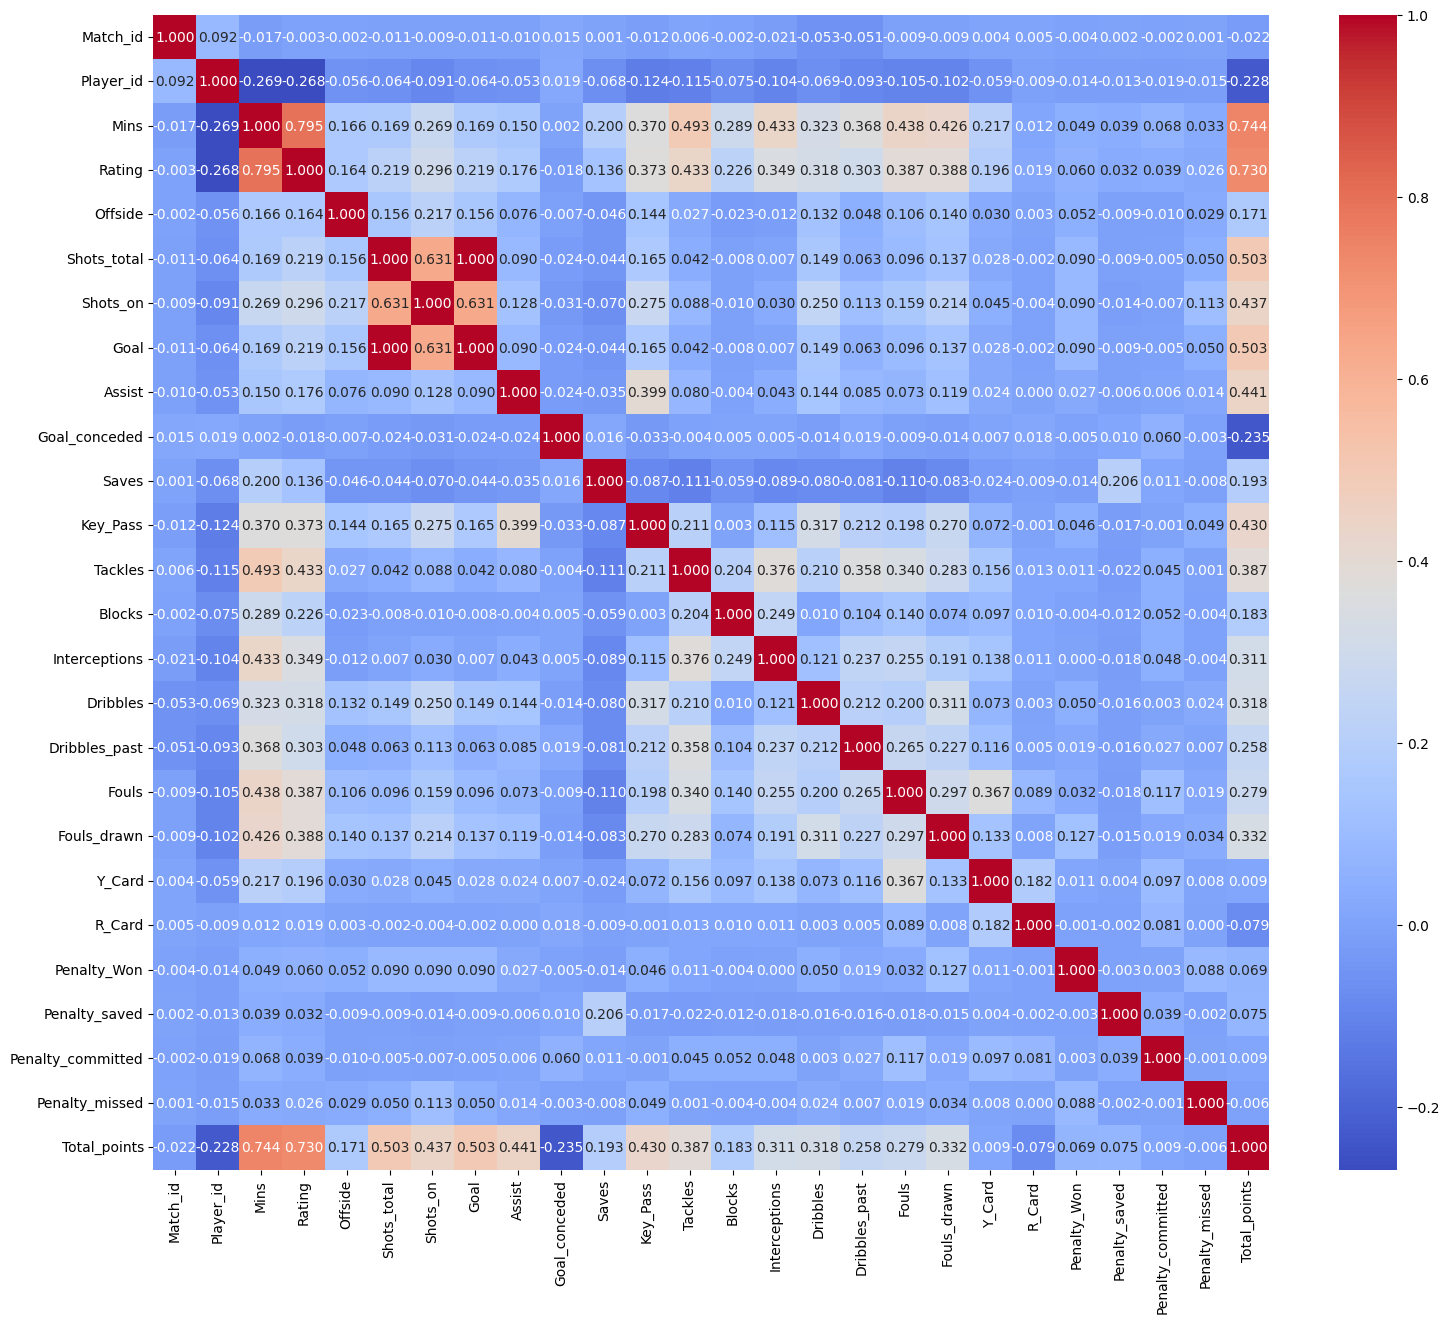

In [5]:
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

plt.figure(figsize=(18, 15))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".3f")

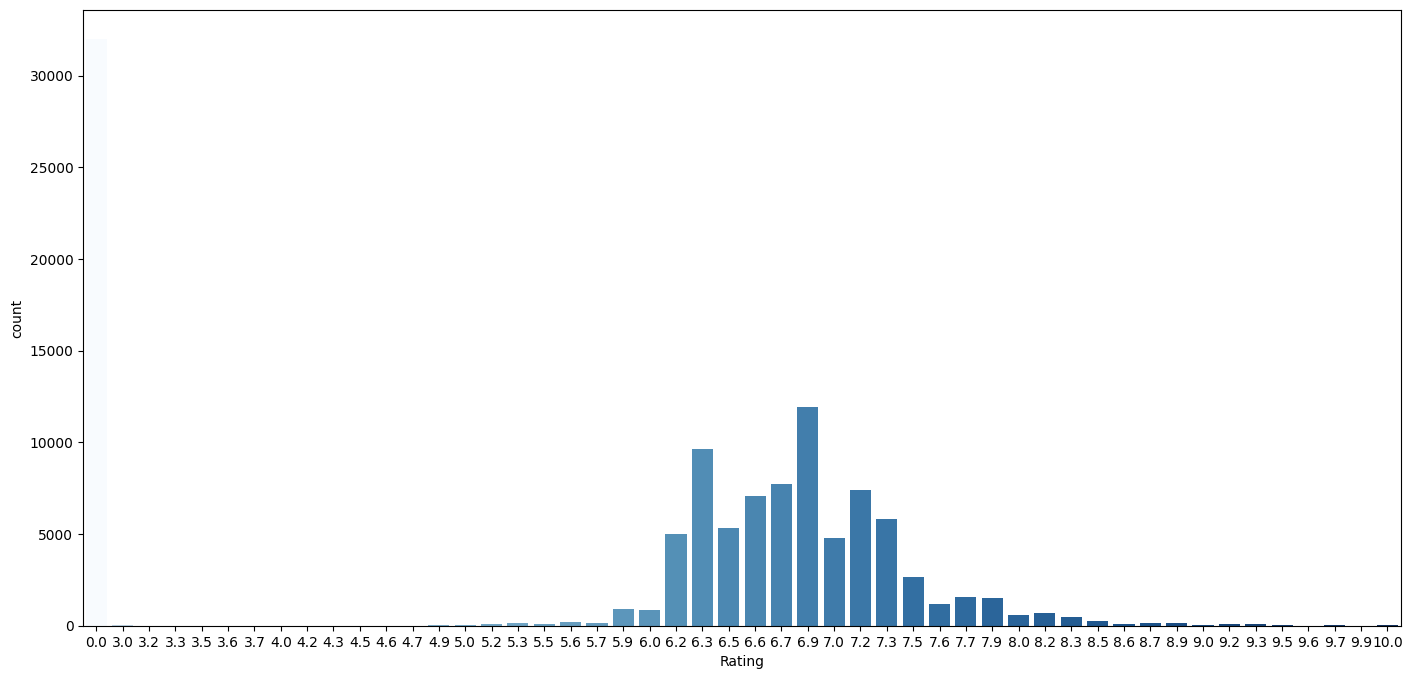

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 8))
sns.countplot(x="Rating", data=df, hue="Rating", palette="Blues", legend=False)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_data = df[["Mins", "Shots_on", "Key_Pass", "Tackles", "Interceptions", "Dribbles", "Dribbles_past", "Fouls", "Fouls_drawn", "Total_points"]]
y_data = df["Rating"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, train_size=0.8, random_state=0)

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
lr = LinearRegression()
lr.fit(x_train, y_train)

print("Accuracy of Linear Regression on training data: ", round(lr.score(x_train, y_train), 5))
print("Accuracy of Linear Regression on test data: ", round(lr.score(x_test, y_test), 5))

y_predicted_lr=lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_predicted_lr)

print('The Mean Square Error of Linear Regression is:', mse_lr)

y_predicted_lr_mape = y_predicted_lr + 1
y_test_mape = y_test + 1
mape_lr = mean_absolute_percentage_error(y_test_mape, y_predicted_lr_mape)

print('The Mean Absolute Percentage Error of Linear Regression is:', mape_lr)

Accuracy of Linear Regression on training data:  0.68302
Accuracy of Linear Regression on test data:  0.68157
The Mean Square Error of Linear Regression is: 3.184042610683068
The Mean Absolute Percentage Error of Linear Regression is: 0.6128191571632906


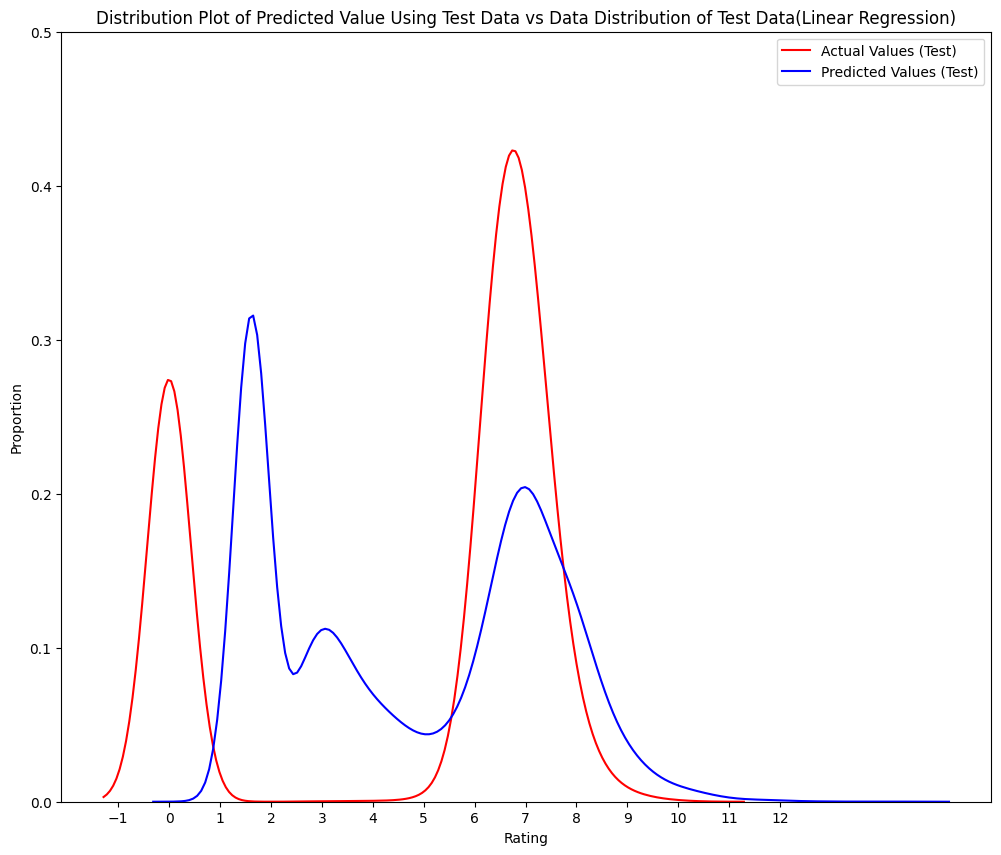

In [15]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data(Linear Regression)'
DistributionPlot(y_test, y_predicted_lr, "Actual Values (Test)", "Predicted Values (Test)", Title)

##  Polynomial Regression

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(), LinearRegression())

degrees = {'polynomialfeatures__degree': range(1, 5)}

gridsearch_pf = GridSearchCV(pipe, param_grid=degrees, cv=10)
gridsearch_pf.fit(x_train, y_train)

print("Best parameters:", gridsearch_pf.best_params_)

Best parameters: {'polynomialfeatures__degree': 4}


In [16]:
pf = gridsearch_pf.best_estimator_
pf.fit(x_train, y_train)

print("Accuracy of Polynomial Regression on training data: ",
round(pf.score(x_train, y_train), 5))
print("Accuracy of Polynomial Regression on test data: ",
round(pf.score(x_test, y_test), 5))

y_predicted_pf=pf.predict(x_test)
mse_pf = mean_squared_error(y_test, y_predicted_pf)

print('The Mean Square Error of Polynomial Regression is:', mse_pf)

y_predicted_pf_mape = y_predicted_pf + 1
mape_pf = mean_absolute_percentage_error(y_test_mape, y_predicted_pf_mape)

print('The Mean Absolute Percentage Error of Polynomial Regression is:', mape_pf)

Accuracy of Polynomial Regression on training data:  0.9705
Accuracy of Polynomial Regression on test data:  0.96678
The Mean Square Error of Polynomial Regression is: 0.3322138849320206
The Mean Absolute Percentage Error of Polynomial Regression is: 0.07164205126753095


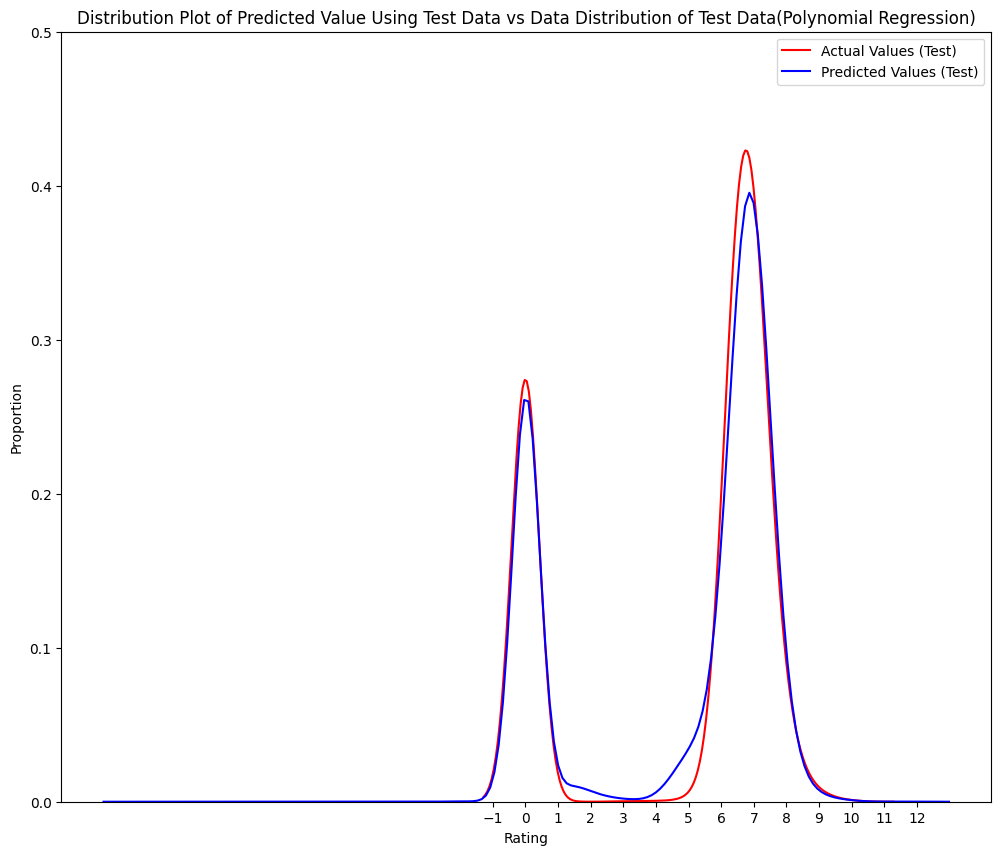

In [17]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data(Polynomial Regression)'
DistributionPlot(y_test, y_predicted_pf, "Actual Values (Test)", "Predicted Values (Test)", Title)

## K-NN Regression

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

params = {'n_neighbors': range(1, 5)}

gridsearch_knn = GridSearchCV(knn, params, cv=10)
gridsearch_knn.fit(x_train, y_train)

print("Best parametrs - ", gridsearch_knn.best_estimator_)

Best parametrs -  KNeighborsRegressor(n_neighbors=4)


In [37]:
knn = gridsearch_knn.best_estimator_
knn.fit(x_train, y_train)

print("Accuracy of K-NN Regression on training data: ",
round(knn.score(x_train, y_train), 5))
print("Accuracy of K-NN Regression on test data: ",
round(knn.score(x_test, y_test), 5))

y_predicted_knn=knn.predict(x_test)
mse_knn = mean_squared_error(y_test, y_predicted_knn)

print('The Mean Square Error of K-NN Regression is:', mse_knn)

y_predicted_knn_mape = y_predicted_knn + 1
mape_knn = mean_absolute_percentage_error(y_test_mape, y_predicted_knn_mape)

print('The Mean Absolute Percentage Error of K-NN Regression is:', mape_knn)

Accuracy of K-NN Regression on training data:  0.99377
Accuracy of K-NN Regression on test data:  0.99014
The Mean Square Error of K-NN Regression is: 0.09856179891504231
The Mean Absolute Percentage Error of K-NN Regression is: 0.025850235410600084


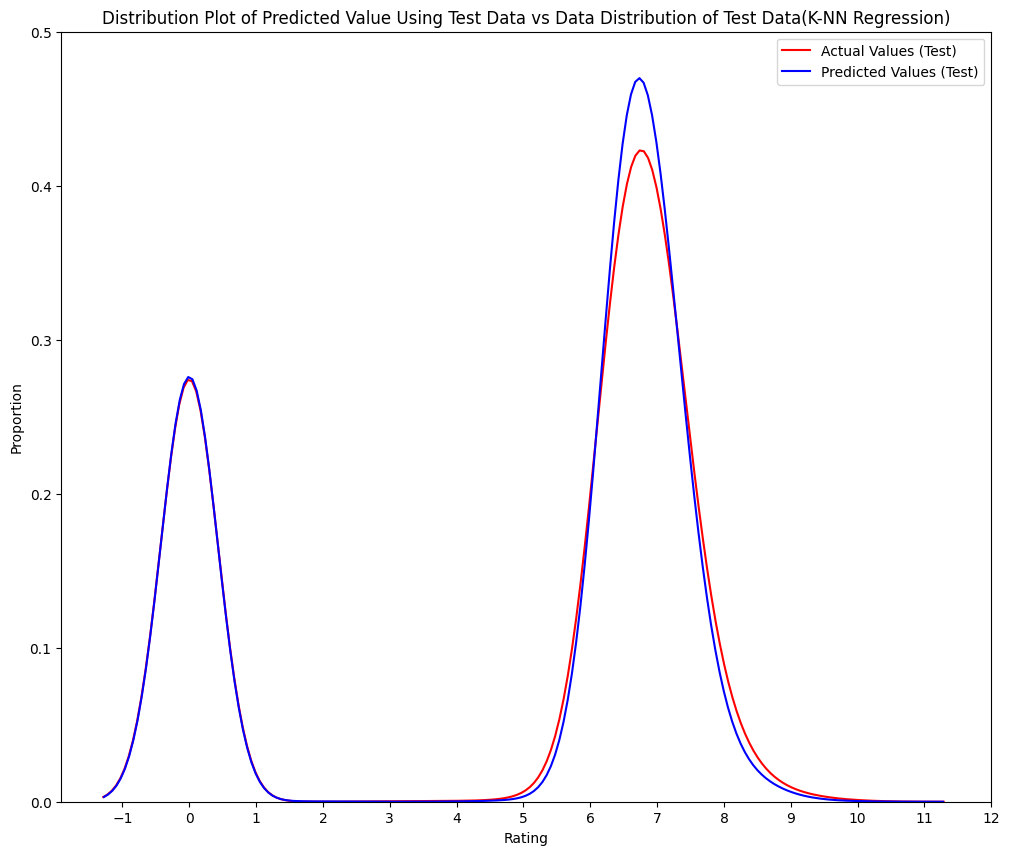

In [19]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data(K-NN Regression)'
DistributionPlot(y_test, y_predicted_knn, "Actual Values (Test)", "Predicted Values (Test)", Title)

## Extra Trees Regression

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
extratrees = ExtraTreesRegressor()

params = {'max_depth': range(1, 10)}

gridsearch_extratrees = GridSearchCV(extratrees, params, cv=10)
gridsearch_extratrees.fit(x_train, y_train)

print("Best parametrs - ", gridsearch_extratrees.best_estimator_)

Best parametrs -  ExtraTreesRegressor(max_depth=9)


In [44]:
extratrees = gridsearch_extratrees.best_estimator_
extratrees.fit(x_train, y_train)

print("Accuracy of Extra Trees Regression on training data: ",
round(extratrees.score(x_train, y_train), 5))
print("Accuracy of Extra Trees Regression on test data: ",
round(extratrees.score(x_test, y_test), 5))

y_predicted_extratrees=extratrees.predict(x_test)
mse_extratrees = mean_squared_error(y_test, y_predicted_extratrees)

print('The Mean Square Error of Extra Trees Regression is:', mse_extratrees)

y_predicted_extratrees_mape = y_predicted_extratrees + 1
mape_extratrees = mean_absolute_percentage_error(y_test_mape, y_predicted_extratrees_mape)

print('The Mean Absolute Percentage Error of Extra Trees Regression is:', mape_extratrees)

Accuracy of Extra Trees Regression on training data:  0.99158
Accuracy of Extra Trees Regression on test data:  0.99103
The Mean Square Error of Extra Trees Regression is: 0.08965756803109684
The Mean Absolute Percentage Error of Extra Trees Regression is: 0.02687897056619723


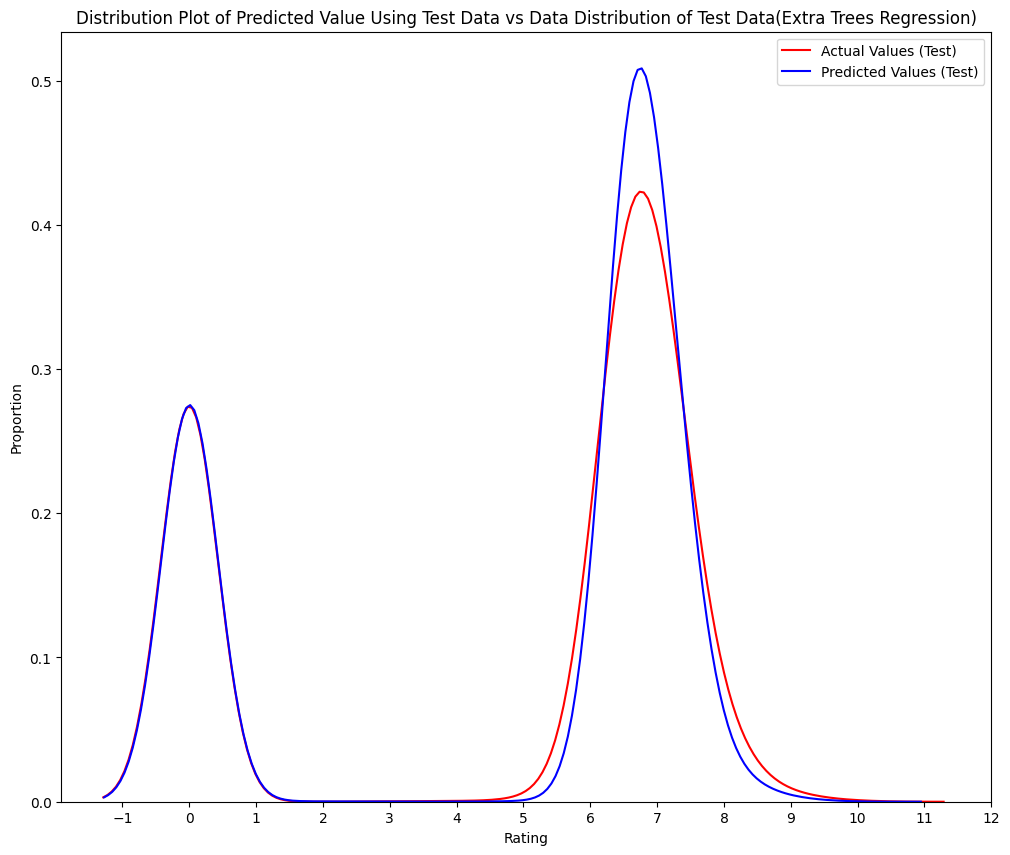

In [46]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data(Extra Trees Regression)'
DistributionPlot(y_test, y_predicted_extratrees, "Actual Values (Test)", "Predicted Values (Test)", Title)

## Comparison

In [49]:
print("Accuracy on training data for ")
print("Linear Regression: ", round(lr.score(x_train, y_train)*100, 5), '%',
"\tPolynomial Regression: ", round(pf.score(x_train, y_train)*100, 5), '%',
"\tK-NN Regression: ", round(knn.score(x_train, y_train)*100, 5), '%',
"\tExtra Trees Regression: ", round(extratrees.score(x_train, y_train)*100, 5), '%')

print("\nAccuracy on test data for ")
print("Linear Regression: ", round(lr.score(x_test, y_test)*100, 5), '%',
"\tPolynomial Regression: ", round(pf.score(x_test, y_test)*100, 5), '%',
"\tK-NN Regression: ", round(knn.score(x_test, y_test)*100, 5), '%',
"\tExtra Trees Regression: ", round(extratrees.score(x_test, y_test)*100, 5), '%')

print("\nMean Squared Error for ")
print("Linear Regression: ", mse_lr, 
"\tPolynomial Regression: ", mse_pf, 
"\tK-NN Regression: ", mse_knn,
"\tExtra Trees Regression: ", mse_extratrees)

print("\nMean Absolute Percentage Error for ")
print("Linear Regression: ", round(mape_lr*100, 2), '%',
"\tPolynomial Regression: ", round(mape_pf*100, 2), '%',
"\tK-NN Regression: ", round(mape_knn*100, 2), '%',
"\tExtra Trees Regression: ", round(mape_extratrees*100, 2), '%')

Accuracy on training data for 
Linear Regression:  68.30188 % 	Polynomial Regression:  97.04953 % 	K-NN Regression:  99.37689 % 	Extra Trees Regression:  99.15823 %

Accuracy on test data for 
Linear Regression:  68.15742 % 	Polynomial Regression:  96.67764 % 	K-NN Regression:  99.01432 % 	Extra Trees Regression:  99.10336 %

Mean Squared Error for 
Linear Regression:  3.184042610683068 	Polynomial Regression:  0.3322138849320206 	K-NN Regression:  0.09856179891504231 	Extra Trees Regression:  0.08965756803109684

Mean Absolute Percentage Error for 
Linear Regression:  61.28 % 	Polynomial Regression:  7.16 % 	K-NN Regression:  2.59 % 	Extra Trees Regression:  2.69 %


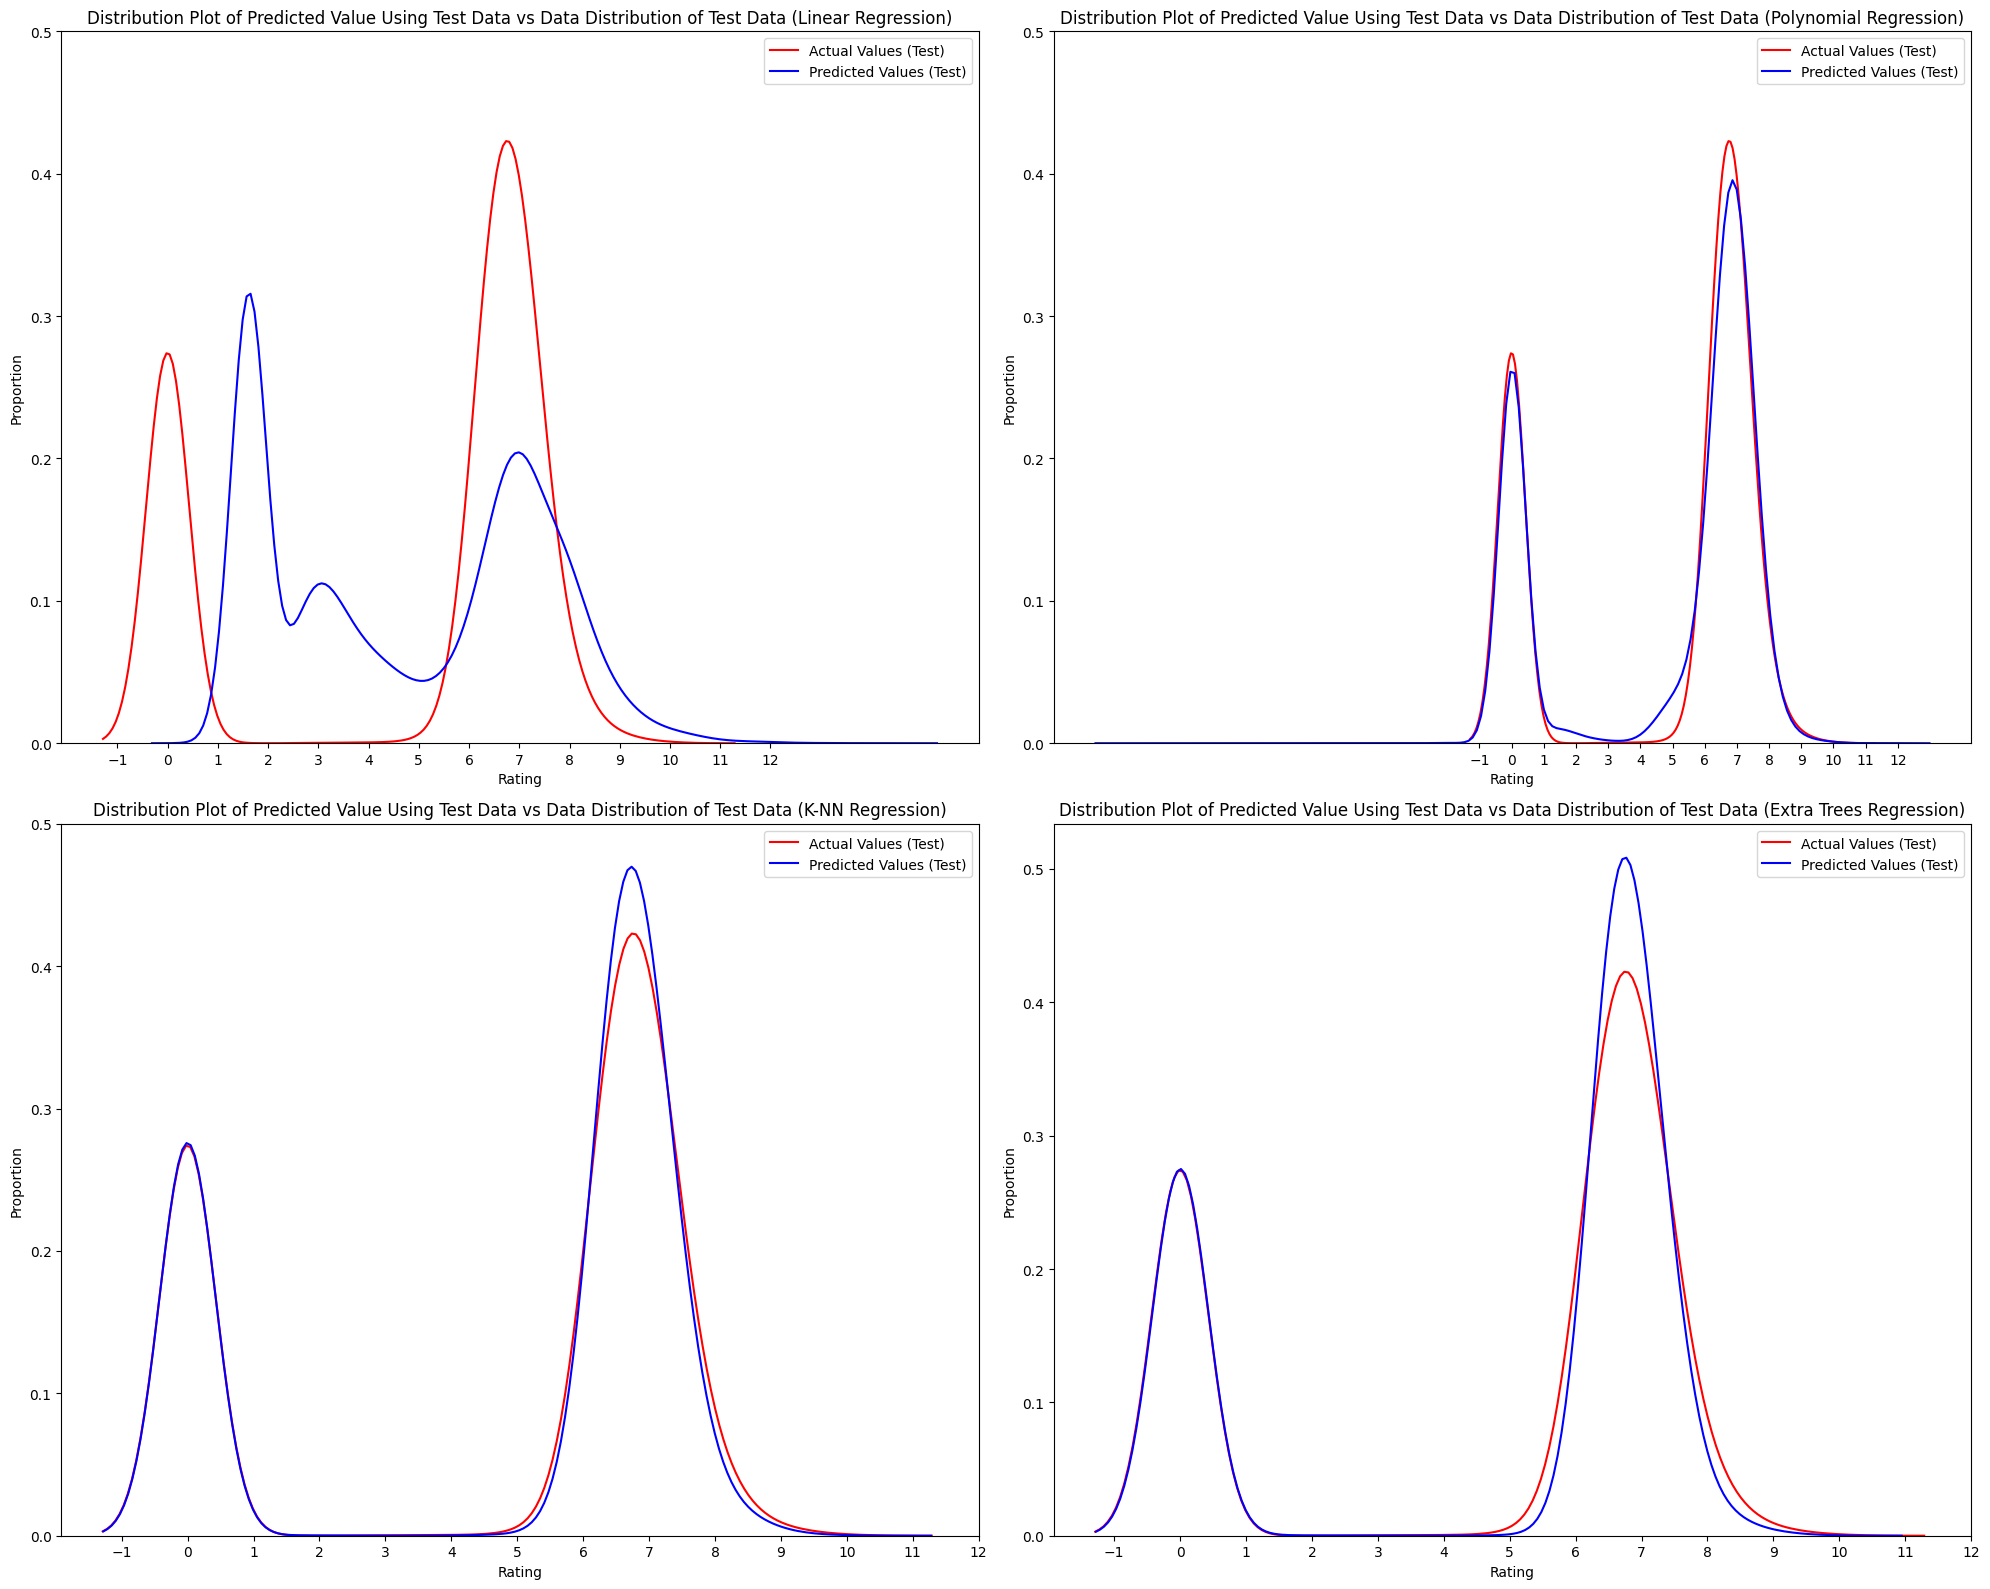

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data (Linear Regression)'
DistributionPlotCompare(y_test, y_predicted_lr, "Actual Values (Test)", "Predicted Values (Test)", Title, axs[0, 0])

Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data (Polynomial Regression)'
DistributionPlotCompare(y_test, y_predicted_pf, "Actual Values (Test)", "Predicted Values (Test)", Title, axs[0, 1])

Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data (K-NN Regression)'
DistributionPlotCompare(y_test, y_predicted_knn, "Actual Values (Test)", "Predicted Values (Test)", Title, axs[1, 0])

Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data (Extra Trees Regression)'
DistributionPlotCompare(y_test, y_predicted_extratrees, "Actual Values (Test)", "Predicted Values (Test)", Title, axs[1, 1])

plt.tight_layout()
plt.show()

In [50]:
total_predictions = len(y_test)

print("Total predictions:", total_predictions)

correct_predictions_lr = (y_test == np.round(y_predicted_lr, 1))
correct_predictions_pf = (y_test == np.round(y_predicted_pf, 1))
correct_predictions_knn = (y_test == np.round(y_predicted_knn, 1))
correct_predictions_extratrees = (y_test ==np.round(y_predicted_extratrees, 1))

print("Number of correct predictions: ")
print("Linear Regression: ", sum(correct_predictions_lr),
"\tPolynomial Regression: ", sum(correct_predictions_pf), 
"\tK-NN Regression: ", sum(correct_predictions_knn),
"\tExtra Trees Regression: ", sum(correct_predictions_extratrees))

Total predictions: 21752
Number of correct predictions: 
Linear Regression:  582 	Polynomial Regression:  7538 	K-NN Regression:  8133 	Extra Trees Regression:  8011


## Additioanl functions

In [31]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    sns.kdeplot(RedFunction, color="r", label=RedName)
    sns.kdeplot(BlueFunction, color="b", label=BlueName)

    plt.title(Title)
    plt.xlabel('Rating')
    plt.ylabel('Proportion')
    plt.legend()

    plt.yticks(np.arange(0, 0.6, 0.1))
    plt.xticks(np.arange(-1, 13, 1))
    
    plt.show()
    plt.close()

def DistributionPlotCompare(RedFunction, BlueFunction, RedName, BlueName, Title, ax):
    sns.kdeplot(RedFunction, color="r", label=RedName, ax=ax)
    sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax)

    ax.set_title(Title)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Proportion')
    ax.legend()

    ax.set_yticks(np.arange(0, 0.6, 0.1))
    ax.set_xticks(np.arange(-1, 13, 1))

<h2>Виконав студент групи ІП-21<br>  Гричина Нікіта</h2>